## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [255]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [256]:
bitstamp_df = pd.read_csv(Path('Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [257]:
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [258]:
coinbase_df = pd.read_csv(Path('Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

In [259]:
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [260]:
bitstamp_df = bitstamp_df.dropna().copy()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [261]:
bitstamp_df["Close"] = bitstamp_df["Close"].str.replace('$', '', regex=False).copy()

### Step 3: Convert the data type of the Close column to a `float`.

In [262]:
bitstamp_df["Close"] = bitstamp_df["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [263]:
bitstamp_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129067, dtype: bool

In [264]:
bitstamp_df = bitstamp_df.drop_duplicates().copy()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [265]:
coinbase_df = coinbase_df.dropna().copy()

In [266]:
coinbase_df["Close"] = coinbase_df["Close"].str.replace('$', '', regex=False).copy()

In [267]:
coinbase_df["Close"] = coinbase_df["Close"].astype("float")

In [268]:
coinbase_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129322, dtype: bool

In [269]:
coinbase_df = coinbase_df.drop_duplicates().copy()

## Analyze the Data

Your analysis consists of the following tasks: 
1. Choose the columns of data on which to focus your analysis.
2. Get the summary statistics and plot the data.
3. Focus your analysis on specific dates.
4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.
Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:
* Timestamp (index)
* Close

In [270]:
bitstamp_sliced = bitstamp_df.iloc[:,[3]]
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [271]:
coinbase_sliced = coinbase_df.iloc[:,[3]]
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [272]:
bitstamp_sliced.describe(include='all')

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [273]:
coinbase_sliced.describe(include='all')

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


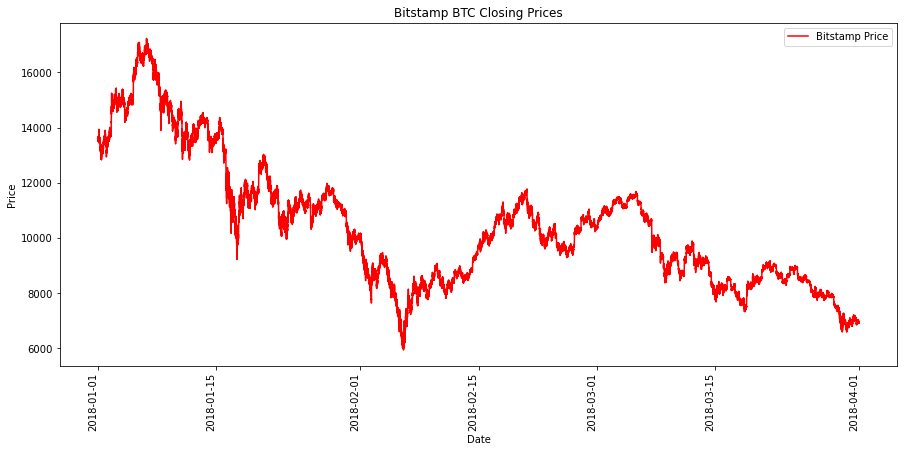

In [274]:
bitstamp_sliced.plot(figsize=(15,7), rot=90, color="red")
plt.title('Bitstamp BTC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Bitstamp Price'])
plt.show()

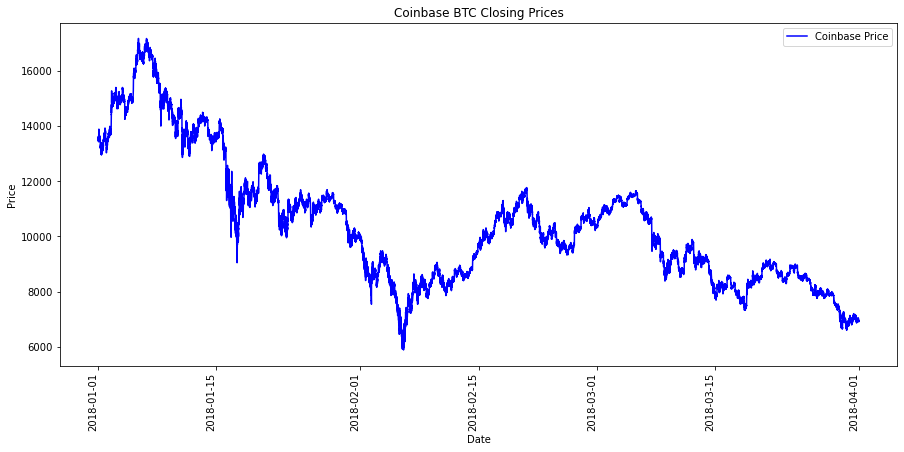

In [275]:
coinbase_sliced.plot(figsize=(15,7), rot=90, color="blue")
plt.title('Coinbase BTC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Coinbase Price'])
plt.show()

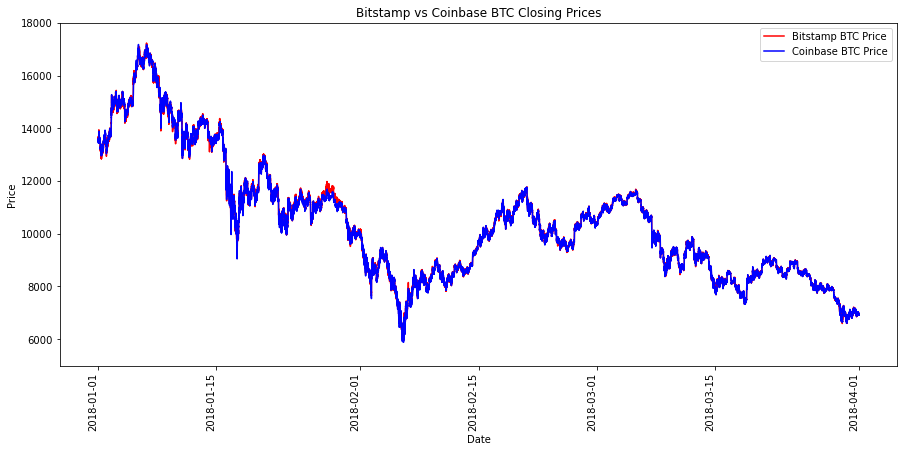

In [276]:
ax = bitstamp_sliced.plot(figsize=(15,7), rot=90, color="red")
coinbase_sliced.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(5000,18000)
plt.show()

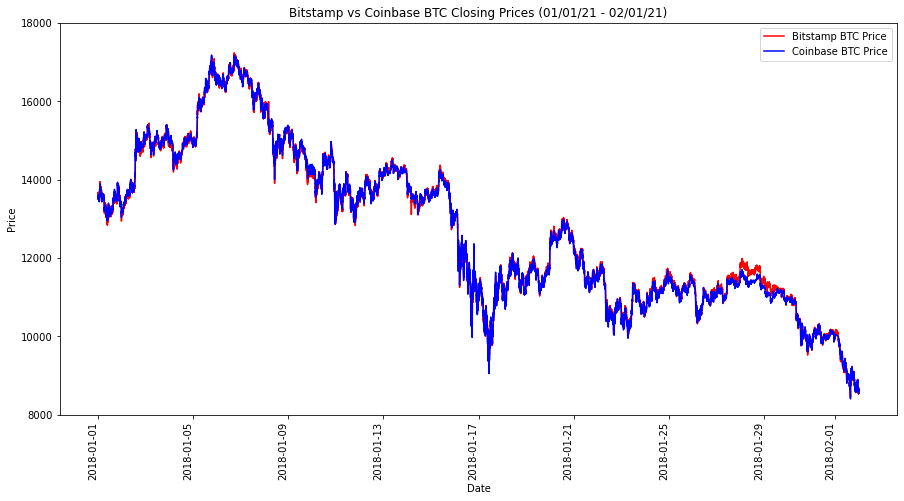

In [277]:
first_month_bitstamp = bitstamp_sliced.loc['2018-01-01':'2018-02-01']
first_month_coinbase = coinbase_sliced.loc['2018-01-01':'2018-02-01']
ax = first_month_bitstamp.plot(figsize=(15,8), rot=90, color="red")
first_month_coinbase.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices (01/01/21 - 02/01/21)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(8000,18000)
plt.show()

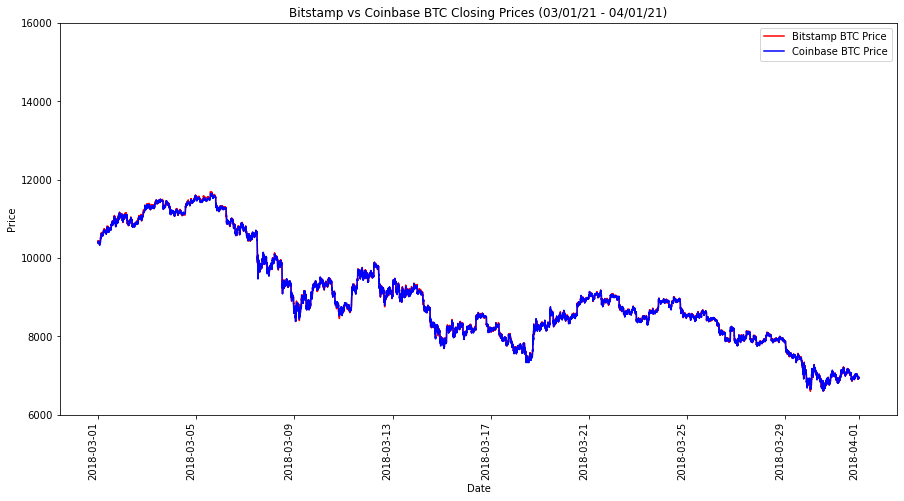

In [315]:
last_month_bitstamp = bitstamp_sliced.loc['2018-03-01':'2018-04-01']
last_month_coinbase = coinbase_sliced.loc['2018-03-01':'2018-04-01']
ax = last_month_bitstamp.plot(figsize=(15,8), rot=90, color="red")
last_month_coinbase.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices (03/01/21 - 04/01/21)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(6000,16000)
plt.show()

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The data suggests that the degree of spread between BTC price listings on Bitstamp and Coinbase has decreased over the 4-month timeframe. As seen in the two figures above (each representing one month of BTC price differential between Bitstamp and Coinbase), price spreads are much larger during the first month of data when compared to the final month of data. If we analyze the month of January (top plot), we can see many small price variations during dips and peaks between the dates 01/01/21 and 01/16/21. Once again, between the dates 01-26-21 and 01-20-21, we see a multiday period where the Bitstamp BTC price listing was significantly higher than the price listed on Coinbase.

Examining the second plot containing the final month of price data, we can see that the data displays a negligible amount of price spread between the dates 03-02-21 and 03-06-21, but this variation is far lower than the first month's data. The rest of the final month data exhibits near-parity between the prices found on either exchange.

These two plots both contain a price range of 10,000 dollars. The minimum and maximum prices are different, but the equal range allows us to compare the plots without any incongruencies or exhaggerations in price differences.

Short Answer: Yes, there is a noticeable decrease in price spread as time moves forward.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

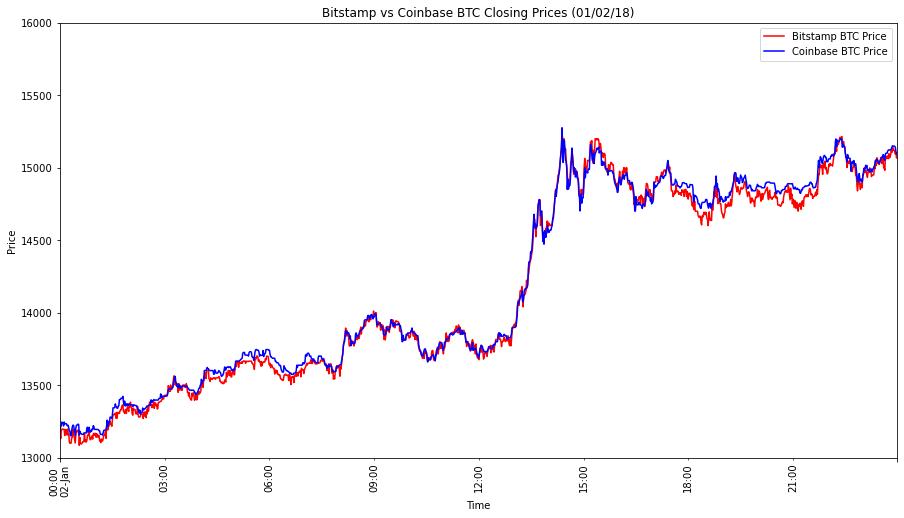

In [279]:
first_day_bitstamp = bitstamp_sliced.loc['2018-01-02 00:00':'2018-01-02 23:59']
first_day_coinbase = coinbase_sliced.loc['2018-01-02 00:00':'2018-01-02 23:59']
ax = first_day_bitstamp.plot(figsize=(15,8), rot=90, color="red")
first_day_coinbase.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices (01/02/18)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(13000,16000)
plt.show()

In [280]:
arbitrage_spread_early = first_day_coinbase - first_day_bitstamp
arbitrage_spread_early.describe(include="all")

,Close
count,1440.000000
mean,24.992396
std,40.490058
min,-110.880000
25%,-1.592500
50%,27.010000
75%,52.050000
max,148.000000


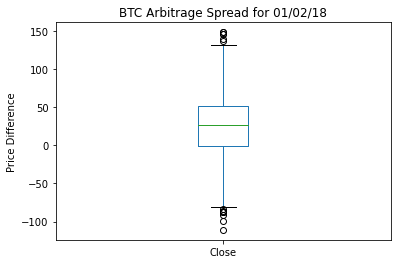

In [281]:
arbitrage_spread_early.plot(kind="box")
plt.title('BTC Arbitrage Spread for 01/02/18')
plt.ylabel('Price Difference')
plt.show()

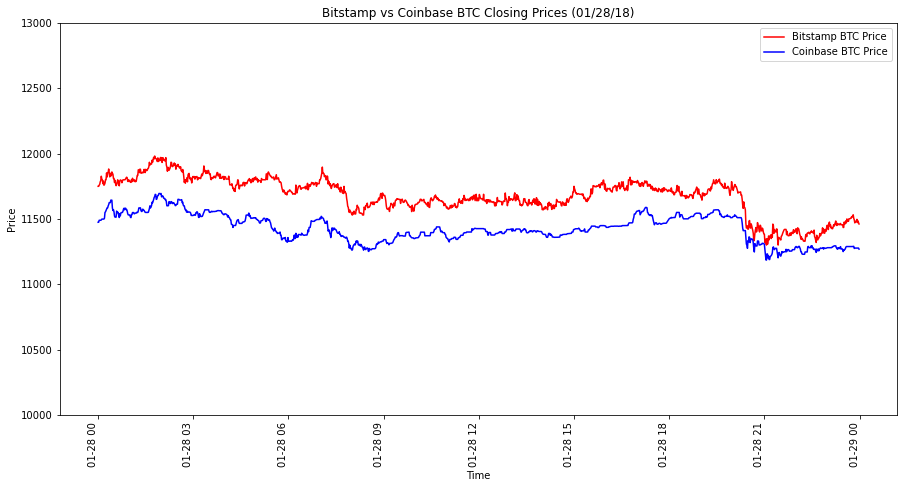

In [282]:
middle_day_bitstamp = bitstamp_sliced.loc['2018-01-28 00:00':'2018-01-28 23:59']
middle_day_coinbase = coinbase_sliced.loc['2018-01-28 00:00':'2018-01-28 23:59']
ax = middle_day_bitstamp.plot(figsize=(15,8), rot=90, color="red")
middle_day_coinbase.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices (01/28/18)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(10000,13000)
plt.show()

In [283]:
arbitrage_spread_middle = middle_day_bitstamp - middle_day_coinbase
arbitrage_spread_middle.describe(include="all")

,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


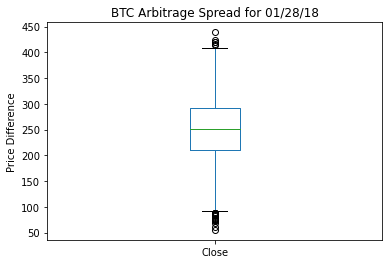

In [284]:
arbitrage_spread_middle.plot(kind="box")
plt.title('BTC Arbitrage Spread for 01/28/18')
plt.ylabel('Price Difference')
plt.show()

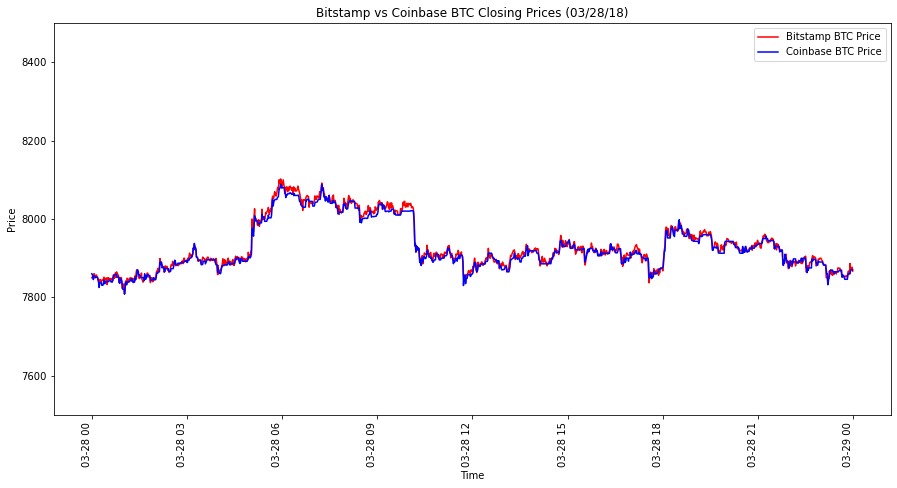

In [285]:
late_day_bitstamp = bitstamp_sliced.loc['2018-03-28 00:00':'2018-03-28 23:59']
late_day_coinbase = coinbase_sliced.loc['2018-03-28 00:00':'2018-03-28 23:59']
ax = late_day_bitstamp.plot(figsize=(15,8), rot=90, color="red")
late_day_coinbase.plot(ax=ax, rot=90, color="blue")
plt.title('Bitstamp vs Coinbase BTC Closing Prices (03/28/18)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Bitstamp BTC Price','Coinbase BTC Price'])
plt.ylim(7500,8500)
plt.show()

In [286]:
arbitrage_spread_late = late_day_bitstamp - late_day_coinbase
arbitrage_spread_late.describe(include="all")

,Close
count,1438.00000
mean,4.42427
std,7.44509
min,-26.30000
25%,-0.48000
50%,4.53500
75%,8.99000
max,28.73000


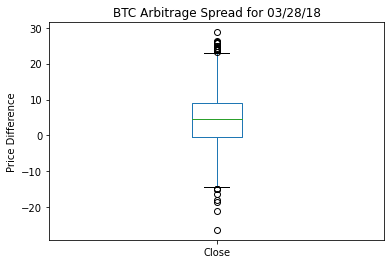

In [287]:
arbitrage_spread_late.plot(kind="box")
plt.title('BTC Arbitrage Spread for 03/28/18')
plt.ylabel('Price Difference')
plt.show()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [288]:
arbitrage_spread_early = first_day_coinbase - first_day_bitstamp 
arbitrage_spread_early.describe(include="all")

,Close
count,1440.000000
mean,24.992396
std,40.490058
min,-110.880000
25%,-1.592500
50%,27.010000
75%,52.050000
max,148.000000


In [289]:
arbitrage_spread_middle = middle_day_bitstamp - middle_day_coinbase
arbitrage_spread_middle.describe(include="all")

,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


In [290]:
arbitrage_spread_late = late_day_bitstamp - late_day_coinbase
arbitrage_spread_late.describe(include="all")

,Close
count,1438.00000
mean,4.42427
std,7.44509
min,-26.30000
25%,-0.48000
50%,4.53500
75%,8.99000
max,28.73000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [291]:
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / first_day_bitstamp
spread_return_early.describe(include="all").round(5)

,Close
count,1045.00000
mean,0.00310
std,0.00195
min,0.00000
25%,0.00154
50%,0.00292
75%,0.00436
max,0.01007


In [292]:
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / middle_day_coinbase
spread_return_middle.describe(include="all").round(5)

,Close
count,1436.00000
mean,0.02165
std,0.00596
min,0.00488
25%,0.01837
50%,0.02190
75%,0.02529
max,0.03851


In [293]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / late_day_coinbase
spread_return_late.describe(include="all").round(5)

,Close
count,1028.00000
mean,0.00099
std,0.00069
min,0.00000
25%,0.00047
50%,0.00087
75%,0.00135
max,0.00356


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [294]:
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_early.dropna().head(10)

,Close
Timestamp,
2018-01-02 21:08:00,0.010060
2018-01-02 21:09:00,0.010068


In [295]:
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_middle.dropna().head(10)

,Close
Timestamp,
2018-01-28 00:00:00,0.023999
2018-01-28 00:01:00,0.023965
2018-01-28 00:02:00,0.023392
2018-01-28 00:03:00,0.023936
2018-01-28 00:04:00,0.025610
2018-01-28 00:05:00,0.026465
2018-01-28 00:06:00,0.029151
2018-01-28 00:07:00,0.026618
2018-01-28 00:08:00,0.026180


In [296]:
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
profitable_trades_late.dropna().head(10)

,Close
Timestamp,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [297]:
profitable_trades_early[profitable_trades_early > 0.01].describe(include="all")

,Close
count,2.000000
mean,0.010064
std,0.000006
min,0.010060
25%,0.010062
50%,0.010064
75%,0.010066
max,0.010068


In [298]:
profitable_trades_middle[profitable_trades_middle > 0.01].describe(include="all")

,Close
count,1378.000000
mean,0.022201
std,0.005421
min,0.010087
25%,0.019016
50%,0.022191
75%,0.025413
max,0.038510


In [299]:
profitable_trades_late[profitable_trades_late > 0.01].describe(include="all")

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [300]:
profit_early = profitable_trades_early * first_day_bitstamp
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early.head()

,Close
Timestamp,
2018-01-02 21:08:00,147.97
2018-01-02 21:09:00,148.00


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [301]:
profit_per_trade_early.describe(include="all")

,Close
count,2.000000
mean,147.985000
std,0.021213
min,147.970000
25%,147.977500
50%,147.985000
75%,147.992500
max,148.000000


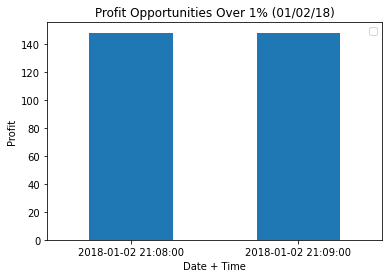

In [302]:
profit_per_trade_early.plot(kind="bar", rot=0)
plt.title('Profit Opportunities Over 1% (01/02/18)')
plt.xlabel('Date + Time')
plt.ylabel('Profit')
plt.legend([])
plt.show() # I chose a bar figure for this day since there were only 2 values above 1%.

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [303]:
total_profits_early = profit_per_trade_early.sum()
total_profits_early

Close    295.97
dtype: float64

In [304]:
profit_middle = profitable_trades_middle * middle_day_coinbase
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

,Close
Timestamp,
2018-01-28 00:00:00,275.38
2018-01-28 00:01:00,275.00
2018-01-28 00:02:00,268.77
2018-01-28 00:03:00,275.03
2018-01-28 00:04:00,294.26
...,...
2018-01-28 23:55:00,220.10
2018-01-28 23:56:00,195.11
2018-01-28 23:57:00,208.74


In [305]:
profit_per_trade_middle.describe(include="all")

,Close
count,1378.000000
mean,253.931996
std,62.057953
min,113.970000
25%,217.272500
50%,254.150000
75%,292.987500
max,439.010000


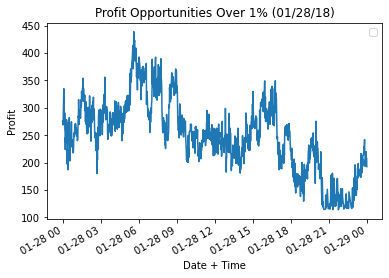

In [306]:
profit_per_trade_middle.plot()
plt.title('Profit Opportunities Over 1% (01/28/18)')
plt.xlabel('Date + Time')
plt.ylabel('Profit')
plt.legend([])
plt.show()

In [307]:
total_profits_middle = profit_per_trade_middle.sum()
total_profits_middle # Total profits on 1/28/18

Close    349918.29
dtype: float64

In [308]:
profit_late = profitable_trades_late * late_day_coinbase
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

,Close
Timestamp,


In [309]:
profit_per_trade_late.describe(include="all")

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [310]:
# The late day (2018-03-28) that was selected had no opportunities for arbitrage above 1%, therefore a plot of this day is unnecessary. 

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [311]:
cumulative_profit_early = profit_per_trade_early.cumsum()

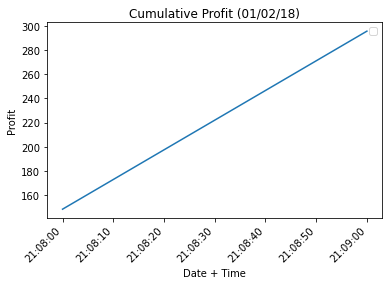

In [312]:
cumulative_profit_early.plot(rot=45)
plt.title('Cumulative Profit (01/02/18)')
plt.xlabel('Date + Time')
plt.ylabel('Profit')
plt.legend([])
plt.show()

In [313]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

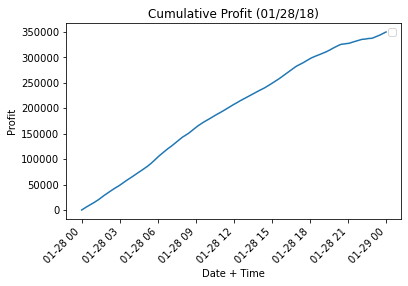

In [314]:
cumulative_profit_middle.plot(rot=45)
plt.title('Cumulative Profit (01/28/18)')
plt.xlabel('Date + Time')
plt.ylabel('Profit')
plt.legend([])
plt.show()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 

The data from the three chosen days suggests that the amount of arbitrage profit opportunities over 1% is strongly correlated to the degree of spread between the two exchanges during that short-term period. For the first day, there was a slight spread between exchanges during dips and peaks, resulting in a few chances to make a profit over 1%. On the middle day, there was a massive spread between exchanges lasting the entire day, resulting in over 1,300 chances to make a profit over 1%. On the last day that was sampled, there was a negligible amount spread between the two exchanges, resulting in zero chances to make any profits over 1%.

When the massive price discrepancy between exchanges occurred on 2018-01-28, it must have caught the eye of thousands, if not millions of crypto investors worldwide. This resulted in a synchronization event between the two exchanges as people raced to buy bitcoin on coinbase to sell it immediately on bitstamp. Events like these prove that bitcoin arbitrage trading is a fleeting opportunity that will become increasingly more difficult to pull off as more people enter the crypto space.